1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedure yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) projections.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline
from scipy import linalg as la
import seaborn as sns

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [7]:
#Dataset generation
N=1000
N_noise=1000
#np.random.seed(12345) #set for reproducibility
N_noise=1
x1=np.random.normal(0,1,N)
x2=x1+np.random.normal(0,3,N)
if N_noise>1:
    for i in range(N_noise):
        std1=np.random.uniform(0.01, 0.10) #select a standard deviation
        x1+=np.random.normal(0,std1,N)     #create and add noise to the variable
    for i in range(N_noise):
        std2=np.random.uniform(0.05, 0.14)
        x2+=np.random.normal(0,std2,N)
        
x3=2*x1+x2

data = pd.DataFrame({'x1' : x1,'x2' : x2,'x3' : x3})
#then Xp=np.dot(U.T,data.T)

matrix=np.array([x1,x2,x3]) #shape is 3 x len(x1), i.e. 3 arrays put in order
#print(matrix)
#matrix=data.T

#Covariance matrix
cov_matrix=np.cov(matrix)
print("The covariance matrix is \n",cov_matrix)
eigval, eigvec=la.eig(cov_matrix)
print("The eigenvalues are \n",eigval)
print("The eigenvectors are \n",eigvec)

#SVD
U, spectrum, Vt = la.svd(matrix)
eigval_svd=spectrum**2/(N-1)
eigvec_svd=U
print("The eigenvalues with SVD are \n",eigval_svd)
print("The eigenvectors with SVD are \n",eigvec_svd)
#There's a (minor) difference in one eigenvalue maybe due to machine precision limits.

print("\n")
#Variability part
#The third eigenvalue is by far the smallest one.
c=np.sum(eigval_svd)
a=eigval_svd[0]/c-1
b=eigval_svd[1]/c
print("The variability of the PCA of the 2 highest components -1 is", a+b)
#It seems reasonable that the third variable is the one to discard with little or no loss of information.
#In fact it has been obtained as a linear combination of the other two.

#Redefinition of data through PCA: rotate all the data points accordingly to the new base
Xp=np.dot(U.T,matrix)
#df=pd.DataFrame(Xp.T)
#df
#print(Xp.T)     
#data

The covariance matrix is 
 [[ 0.99016246  0.99792156  2.97824648]
 [ 0.99792156  9.9223282  11.91817133]
 [ 2.97824648 11.91817133 17.8746643 ]]
The eigenvalues are 
 [ 2.68113815e+01+0.j -9.62075518e-16+0.j  1.97577348e+00+0.j]
The eigenvectors are 
 [[-0.11554498 -0.81649658  0.56567013]
 [-0.57725661 -0.40824829 -0.70718324]
 [-0.80834656  0.40824829  0.42415701]]
The eigenvalues with SVD are 
 [2.68115296e+01 1.97589423e+00 2.52923584e-31]
The eigenvectors with SVD are 
 [[-0.11554802  0.5656695  -0.81649658]
 [-0.5772528  -0.70718635 -0.40824829]
 [-0.80834885  0.42415266  0.40824829]]


The variability of the PCA of the 2 highest components -1 is -4.163336342344337e-17


Text(0, 0.5, '$x_3$')

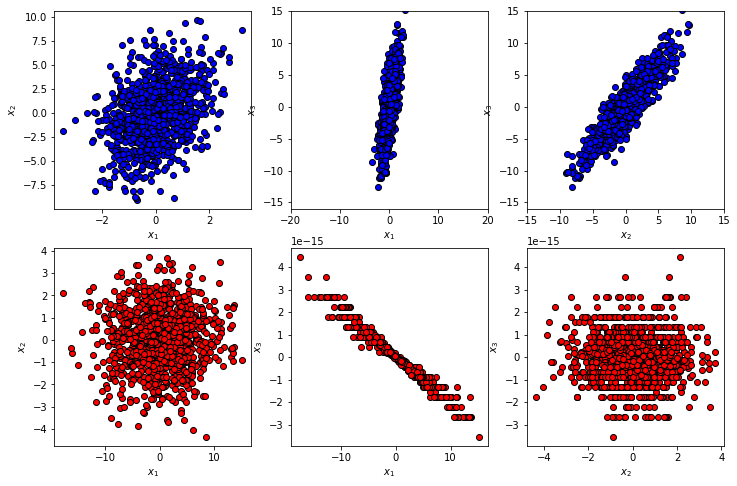

In [5]:
fig, ax=plt.subplots(nrows=2,ncols=3,figsize=(12,8))

#cov matrix
ax[0,0].scatter(matrix[0],matrix[1], edgecolors="black",color="blue")
ax[0,0].set_xlabel("$x_1$")
ax[0,0].set_ylabel("$x_2$")

ax[0,1].scatter(matrix[0],matrix[2], edgecolors="black",color="blue")
ax[0,1].set_xlabel("$x_1$")
ax[0,1].set_ylabel("$x_3$")
ax[0,1].set_xlim((-20, 20)); ax[0,1].set_ylim((-16, 15))

ax[0,2].scatter(matrix[1],matrix[2], edgecolors="black",color="blue")
ax[0,2].set_xlabel("$x_2$")
ax[0,2].set_ylabel("$x_3$")
ax[0,2].set_xlim((-15, 15)); ax[0,2].set_ylim((-16, 15))

#SVD: LOOK @ the scale (1e-15) and check if it's nearly flat
ax[1,0].scatter(Xp[0,:],Xp[1,:], edgecolors="black",color="red")
ax[1,0].set_xlabel("$x_1$")
ax[1,0].set_ylabel("$x_2$")

ax[1,1].scatter(Xp[0,:],Xp[2,:], edgecolors="black",color="red")
ax[1,1].set_xlabel("$x_1$")
ax[1,1].set_ylabel("$x_3$")
#ax[1,1].set_xlim((-20, 20)); ax[1,1].set_ylim((-16, 15))

ax[1,2].scatter(Xp[1],Xp[2], edgecolors="black",color="red")
ax[1,2].set_xlabel("$x_2$")
ax[1,2].set_ylabel("$x_3$")   
#ax[1,2].set_xlim((-15, 15)); ax[1,2].set_ylim((-16, 15))

Hardly any difference can be spotted in comparison with the 3D case.

**TO DO IF TIME LATER**

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 